# Step3: Training the model:
### We will use Naive Bayes (MultinomialNB) because it is fast and excellent for text classification.

## 1-Import libraries:

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## 2- Training the model

In [3]:
# Load the processed data
X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer = joblib.load('../data/processed/processed_data.pkl')

# Initialize the model
model = MultinomialNB()

print("🚀 Training the model... (This should be fast)")
# Train the model using the vectorized text and the labels
model.fit(X_train_tfidf, y_train)
print("✅ Model trained!")

🚀 Training the model... (This should be fast)
✅ Model trained!


## 3- Evaluation


🔮 Making predictions on the Test Set...
🏆 Model Accuracy: 97.99%

📊 Classification Report:
              precision    recall  f1-score   support

      Darija       1.00      0.96      0.98      2191
     English       0.94      0.99      0.96       993
    Français       0.98      1.00      0.99      1500

    accuracy                           0.98      4684
   macro avg       0.97      0.98      0.98      4684
weighted avg       0.98      0.98      0.98      4684



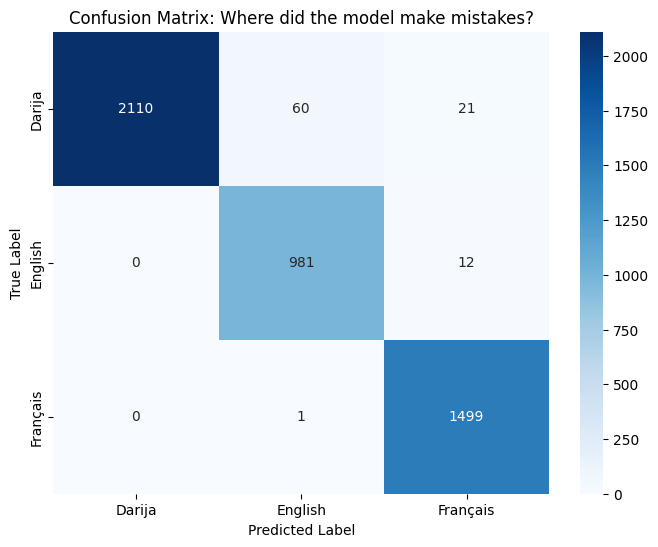

In [4]:
print("\n🔮 Making predictions on the Test Set...")
# Use the model to predict the language of the unseen test data
y_pred = model.predict(X_test_tfidf)

# 1. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🏆 Model Accuracy: {accuracy:.2%}")

# 2. Detailed Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix (Visualizing Mistakes)
# This is crucial to see if Darija is being confused with French or Arabic
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Where did the model make mistakes?')
plt.show()

In [ ]:
import joblib

# Save both the vectorizer and the model
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'language_model.pkl')

print("💾 Model and Vectorizer saved to disk!")

💾 Model and Vectorizer saved to disk!


In [12]:
model.predict(vectorizer.transform(["leadership hya parfait"]))  # Example usage

array(['English'], dtype='<U8')